In [24]:
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
df = pd.read_csv("Data/athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [26]:
sport_1 = df[df["Sport"] == "Tug-Of-War"]
sport_1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5305,3003,Albrekt Persson Almqvist,M,27.0,NaN,NaN,Sweden,SWE,1908 Summer,1908,Summer,London,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,NaN
6935,3891,Arvid Leander Andersson,M,30.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
9536,5230,Rudolf Arnold,M,NaN,NaN,NaN,Austria,AUT,1906 Summer,1906,Summer,Athina,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,NaN
9543,5235,Adriano Arnoldo,M,NaN,192.0,95.0,Italy,ITA,1920 Summer,1920,Summer,Antwerpen,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,NaN


In [27]:
#What years was this sport in the Olympics?
sport_1["Year"].unique()

array([1900, 1908, 1912, 1906, 1920, 1904])

In [28]:
#What countries have participated?
sport_1["NOC"].unique()

array(['DEN', 'SWE', 'AUT', 'ITA', 'GBR', 'FRA', 'NED', 'GER', 'BEL',
       'USA', 'GRE', 'COL', 'RSA'], dtype=object)

<Axes: xlabel='NOC'>

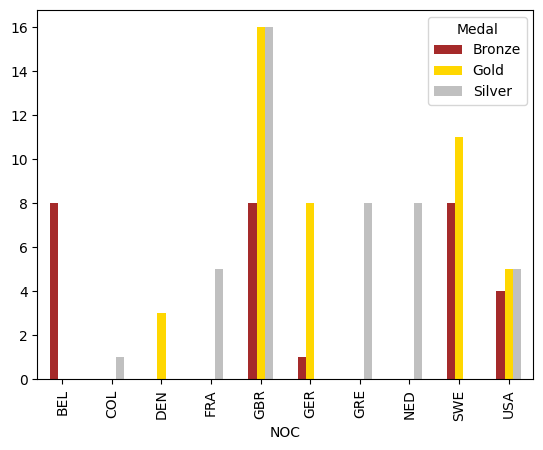

In [29]:
#Bar chart of all medals by country. Need some fixing, title etc
medals = sport_1.groupby(["NOC", "Medal"]).size().reset_index(name="Count")
medals_final = medals.pivot(index="NOC", columns="Medal", values="Count").fillna(0)
medals_final.plot(kind="bar", color=["brown", "gold", "silver"])

In [30]:
#How many people on each team/How many people won gold medal each year?
gold_medals = sport_1[df["Medal"] == "Gold"]
gold_by_year = gold_medals.groupby("Year").size()
gold_by_year

C:\Users\idahe\AppData\Local\Temp\ipykernel_9800\2395392548.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gold_medals = sport_1[df["Medal"] == "Gold"]


Year
1900    6
1904    5
1906    8
1908    8
1912    8
1920    8
dtype: int64

In [31]:
#Function to get number of medals by sport
def total_medals_by_country(df, sport):
    what_sport = df[df["Sport"] == sport]
    medals = what_sport.groupby(["NOC", "Medal"]).size().unstack(fill_value=0)
    return medals

total_medals_by_country(df, "Tug-Of-War")

Medal,Bronze,Gold,Silver
NOC,,,
BEL,8,0,0
COL,0,0,1
DEN,0,3,0
FRA,0,0,5
GBR,8,16,16
GER,1,8,0
GRE,0,0,8
NED,0,0,8
SWE,8,11,0


In [32]:
processed_data = sport_1.dropna(subset=["Age"])
processed_data["Age"].isnull().sum()

np.int64(0)

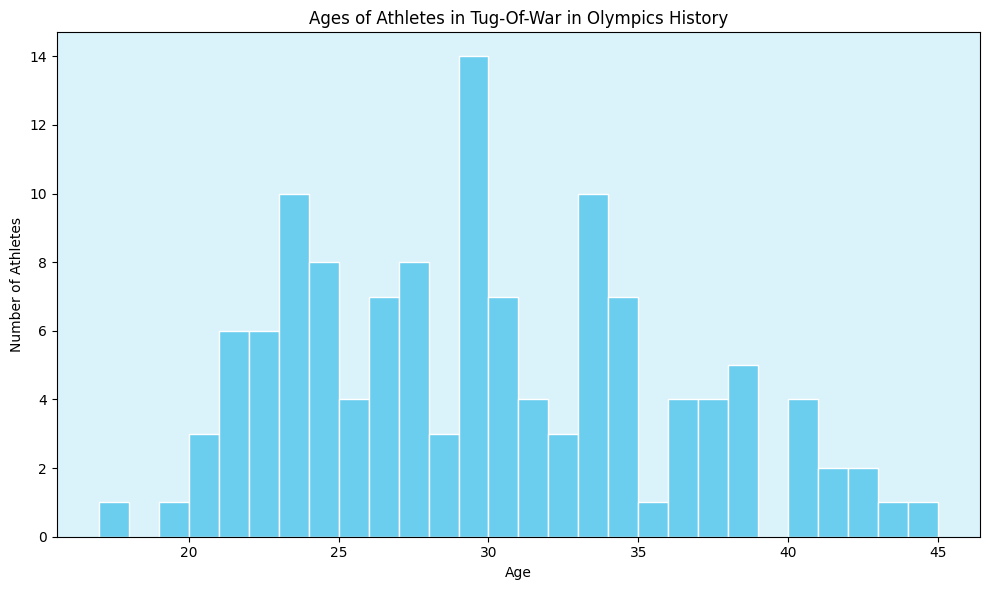

In [33]:
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor("#DAF3FB")

plt.hist(processed_data["Age"], bins=28, color="#6CCEEF", edgecolor="#ffffff")
plt.title("Ages of Athletes in Tug-Of-War in Olympics History")
plt.xlabel("Age")
plt.ylabel("Number of Athletes")
plt.tight_layout()
plt.show()